## Assignment 6 weather
### Grainne Boyle
#### Task - Create a jupyter notebook called assignment_6_weather.ipynb . This task is to pull in data from an URL,  clean the data, analyse the data and present a visual analysis of the data.

In [16]:
# First I need to pull in the data.

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

url = "https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv"

# I was having problem pulling in the file, so I opened it in excel and there are alot of rows at the beginning not needed for the data.
data = pd.read_csv(url, skiprows=23, usecols = ["date","temp","wdsp"], low_memory=False)

data['date'] = pd.to_datetime(data['date'], format='%d-%b-%Y %H:%M', errors='coerce')


data.rename(columns={
    'date': 'Date',
    'temp': 'Temperature',
    'wdsp': 'Wind Speed'
}, inplace=True)



print(data.head(10))

                 Date  Temperature Wind Speed
0 1996-04-10 14:00:00         11.5          0
1 1996-07-31 08:00:00         11.5          0
2 1996-07-31 09:00:00         11.6          0
3 1996-07-31 10:00:00         12.9          0
4 1996-07-31 11:00:00         14.5          0
5 1996-07-31 12:00:00         14.4          0
6 1996-07-31 13:00:00         14.9          0
7 1996-07-31 14:00:00         13.9          0
8 1996-07-31 15:00:00         13.2          0
9 1996-07-31 16:00:00         15.1          0


# Showing a plot of the temperature

In [17]:
# There is a lot of data in the file so I want to plot the temperature over time to show the average temperature over the years. 
# for future analysis I want a separate column for year and month.

data['year'] = data['Date'].dt.year
data['month'] = data['Date'].dt.month

print(data.head(3))

# Calculate the average temperature for each year
average_temp_year = data.groupby('year')['Temperature'].mean()


                 Date  Temperature Wind Speed  year  month
0 1996-04-10 14:00:00         11.5          0  1996      4
1 1996-07-31 08:00:00         11.5          0  1996      7
2 1996-07-31 09:00:00         11.6          0  1996      7


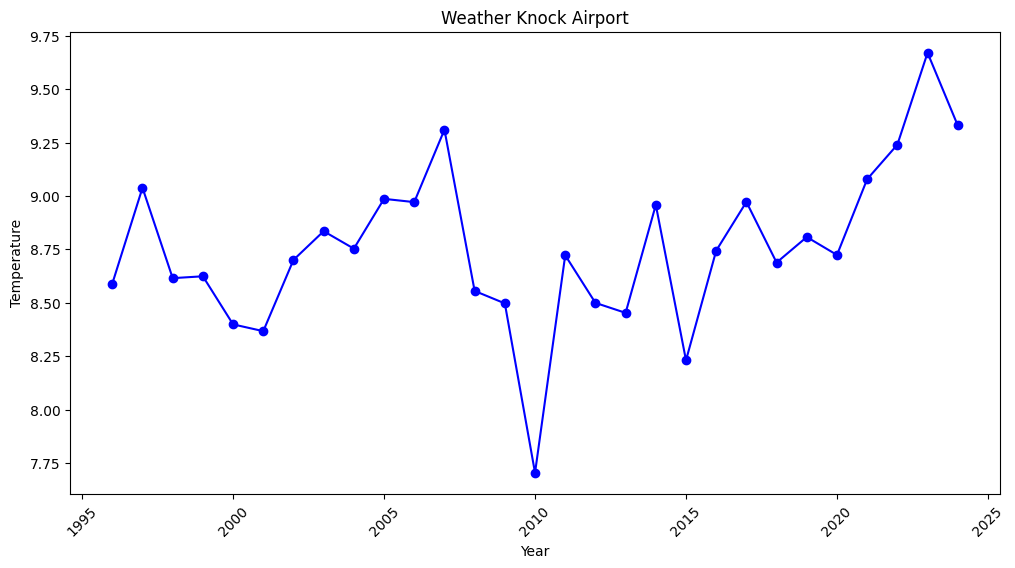

In [18]:
# now i plot the temperature by year using the average temperature for the year
# 
plt.figure(figsize=(12, 6))
average_temp_year.plot(kind='line', marker='o', linestyle='-', color='blue', label='Average Temperature')
plt.title('Weather Knock Airport')
plt.legend
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.xticks(rotation=45) 
plt.savefig('../img/Temperature Knock Airport')
plt.show()

# The plot shows that over the years there have been ups and downs but in 2010 , there was a sgnificant drop in temperature and from 2020 to 2024 the temperatures were rising.
# In 2024, we had the highest average temperature to date since 1995.

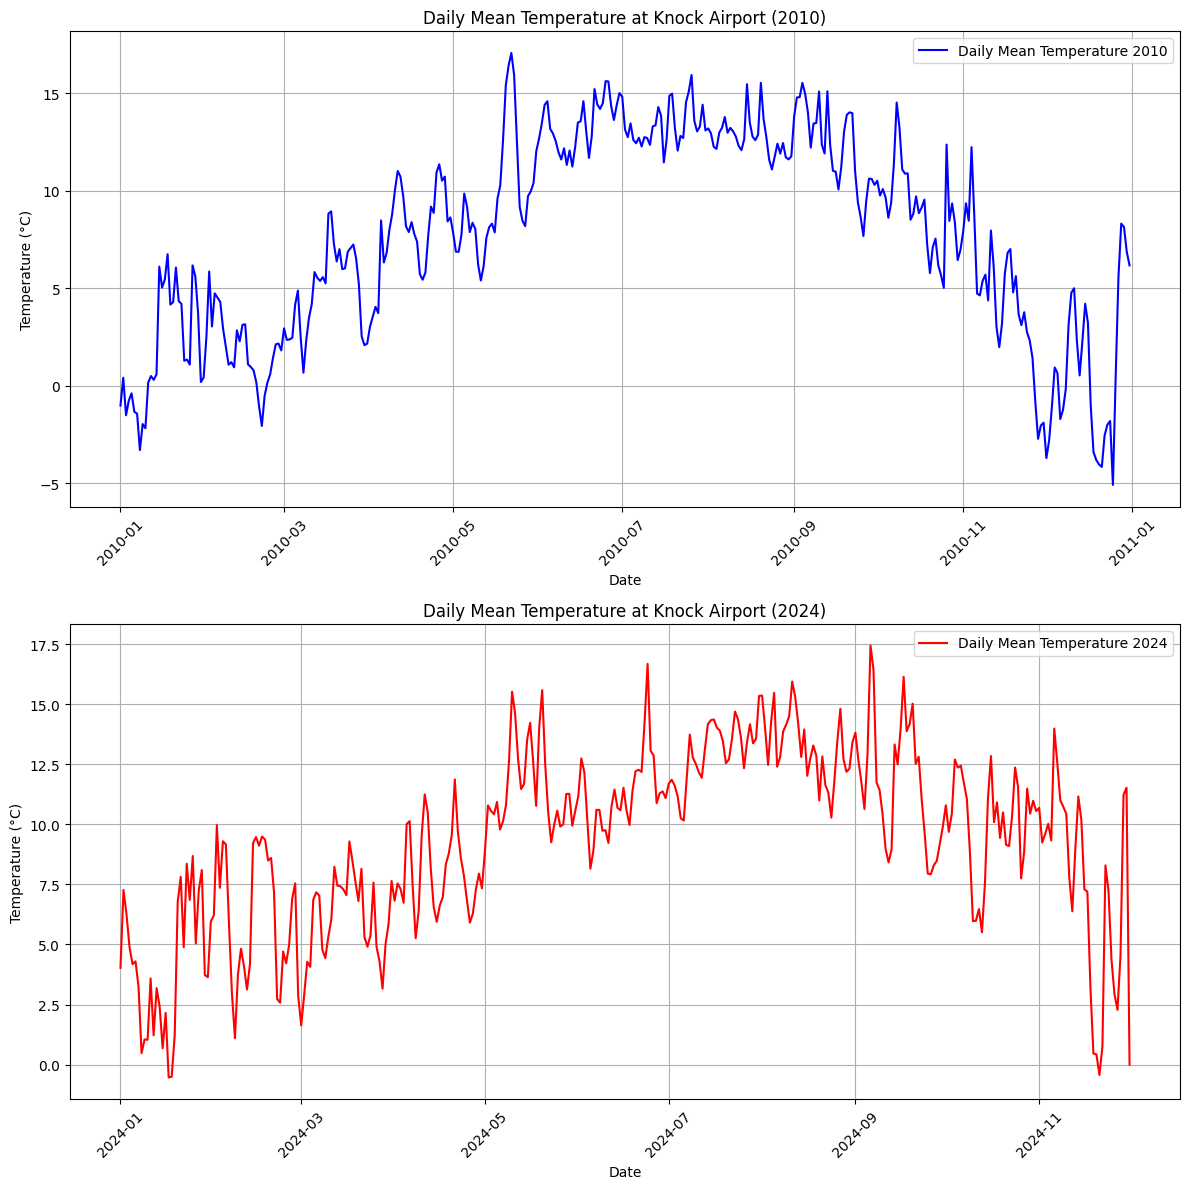

In [19]:

# For the next part, I am going to show two plots , one that shows the year where the average temperature was the coldest (2010)and the year where the average temperature was the highest(2024).

# Select data for the years 2010 and 2024
# Filter the data for the year 2010


# Select the data for 2010
data_2010 = data[data['Date'].dt.year == 2010]
# Calculate daily mean temperature for 2010
daily_mean_temp_2010 = data_2010.groupby(data_2010['Date'].dt.date)['Temperature'].mean()

# Select the data for 2024
data_2024 = data[data['Date'].dt.year == 2024]
# Calculate daily mean temperature for 2024
daily_mean_temp_2024 = data_2024.groupby(data_2024['Date'].dt.date)['Temperature'].mean()


# # Create subplots
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(12, 12))

# Plot for 2010
axs[0].plot(daily_mean_temp_2010.index, daily_mean_temp_2010, linestyle='-', color='blue', label='Daily Mean Temperature 2010')
axs[0].set_title('Daily Mean Temperature at Knock Airport (2010)')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Temperature (°C)')
axs[0].legend()
axs[0].grid(True)
axs[0].tick_params(axis='x', rotation=45)

# Plot for 2024
axs[1].plot(daily_mean_temp_2024.index, daily_mean_temp_2024, linestyle='-', color='red', label='Daily Mean Temperature 2024')
axs[1].set_title('Daily Mean Temperature at Knock Airport (2024)')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Temperature (°C)')
axs[1].legend()
axs[1].grid(True)
axs[1].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.savefig('../img/Daily Mean Temperature at Knock Airport Comparison')


# in the first plot of 2010, you can see that the average daily temperature at its highest was just over 15 degrees and in the last month of the year the averages dipped below zero.
# In the second plot of 2024, you can see that the average daily temperature at its highest was up to 17 degrees, and apart from January never dipped below zero.

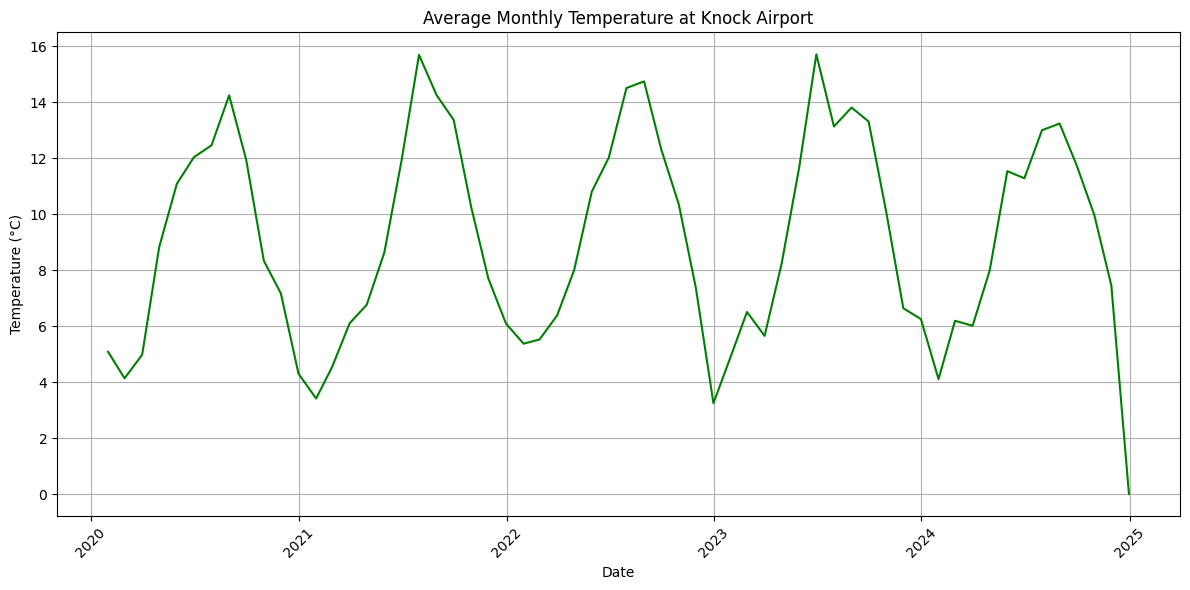

In [20]:
# I will show the data from 2020 2024

import seaborn as sns

# Calculate the average temperature for each month
data.set_index('Date', inplace=True)
selected_data = data['2020':'2024']
# Using resample, I can group the data together by month
# Resample and calculate monthly mean temperature
monthly_mean_temp = selected_data.resample('M')['Temperature'].mean().reset_index()

#Plot using lineplot
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_mean_temp, x='Date', y='Temperature', color='green')
plt.title('Average Monthly Temperature at Knock Airport')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig('../img/Average Monthly Temperature at Knock Airport Comparison')
plt.show()

# This plot shows that in the middle of the year, the temperatures all rise and at the start and the end of the year, the temperatures drop follwing a cyclical pattern.

In [21]:

print(data.columns)

Index(['Temperature', 'Wind Speed', 'year', 'month'], dtype='object')


In [22]:
# Find missing values in the columns, this did not find any.
missing_values = data.isnull().sum()
print(missing_values)

# This shows there are some blank columns.
unique_Wind_Speed = data['Wind Speed'].unique()
print(unique_Wind_Speed)

data['Wind Speed'] = data.loc[:,('Wind Speed')].replace(' ',np.nan)

data = data.dropna()
#  Remove empty values from the columns

Temperature    0
Wind Speed     0
year           0
month          0
dtype: int64
['0' '6' '8' '9' '7' '11' '13' '12' '14' '10' ' ' '4' '5' '3' '2' '15'
 '16' '17' '18' '19' '1' '20' '23' '21' '22' '24' '25' '28' '26' '29' '31'
 '32' '35' '33' '27' '30' '39' '37' '36' '38' '34' '42' '49' '50' '48'
 '43' '40']


In [ ]:
print(data['Wind Speed'].dtype)

# Convert wind speed from an object to a float in order to perform analysis.

data['Wind Speed'] = data['Wind Speed'].astype(float)

print(data['Wind Speed'].dtype)


object
float64


In [24]:
# Calculate the average windspeed per year

average_windspeed_year = data.groupby('year')['Wind Speed'].mean().reset_index()



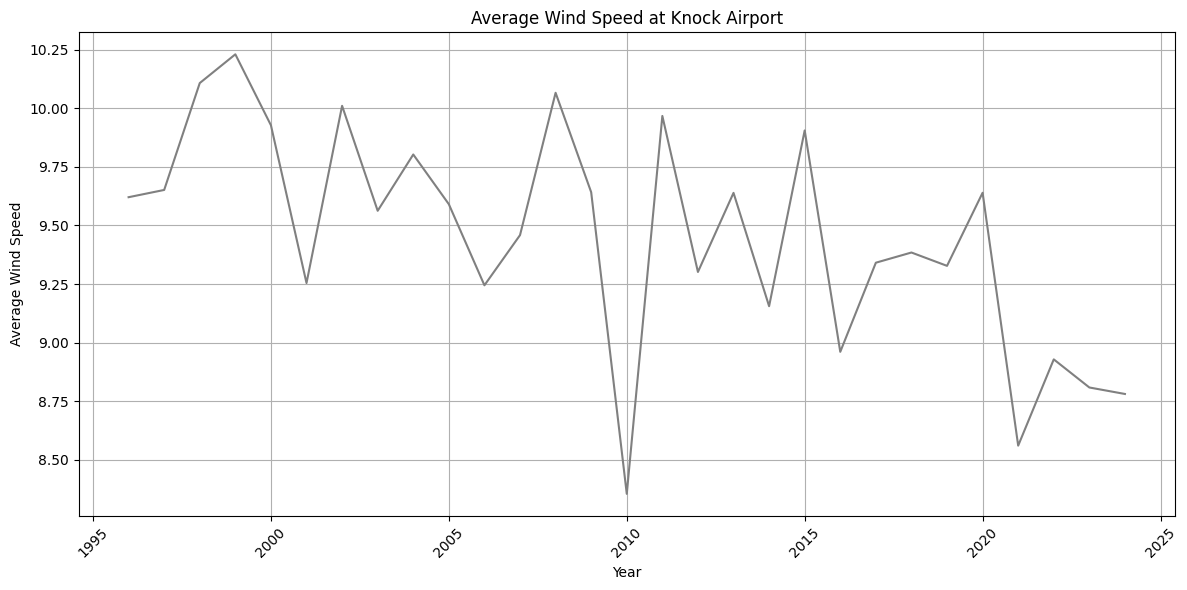

In [25]:
#Create a plot of the windspeed

plt.figure(figsize=(12, 6))
sns.lineplot(data=average_windspeed_year, x='year', y='Wind Speed', color='grey')
plt.title('Average Wind Speed at Knock Airport')
plt.xlabel('Year')
plt.ylabel('Average Wind Speed')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig('../img/Average Wind Speed at Knock Airport')

plt.show()

# The plot shows that the average wind speed has dropped over the last few years. This may be significant in that as the temperatures rose from 2020 to 2024, the wind speed actually dropped in the same period.

## END